In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
SAVE_FIGURES = False
RESULTS_DIR = './results_paper'

## Full rates

In [9]:
EXPERIMENT = 'oracle_rates'

df = pd.read_csv(f'{RESULTS_DIR}/{EXPERIMENT}_results_paper.csv', sep=', ', engine='python')

df = df.rename(
    {
        'sample_size': '# Samples',
        'Number of environments': '# Environments',
        'sparsity': 'Shift fraction',
        'dag_density': 'Density',
        'n_variables': 'Vars',
        'Method': 'Test',
    }, axis=1
).replace(
    {
        'Full PC (oracle)': 'Pooled PC (oracle) [25]',
        'Min changes (oracle)': 'MSS (oracle)',
    }
)

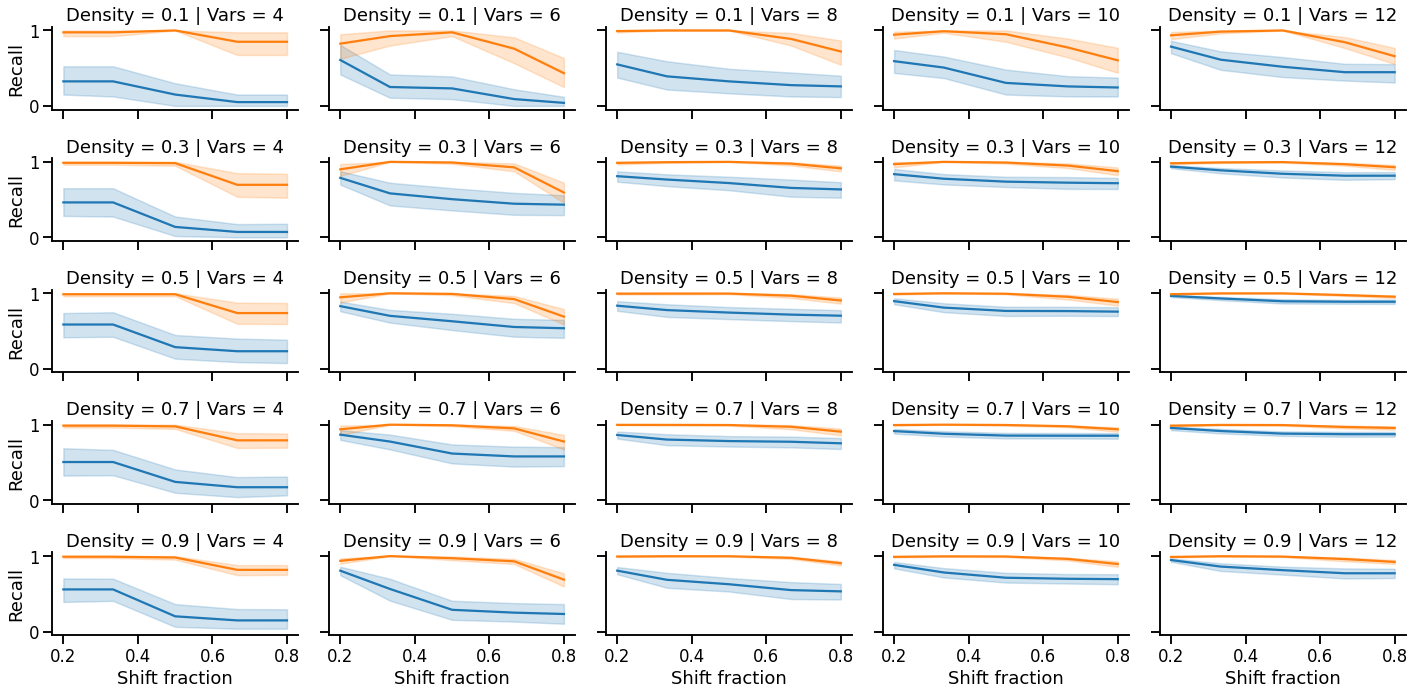

In [10]:
sns.set_context('talk')

for n_env in [5]:
    g = sns.relplot(
        data=df[
            (df['# Environments'] == n_env)
        ],
        x='Shift fraction',
        y='Recall',
        hue='Test',
        row='Density',
        col='Vars',
        kind='line',
        height=2,
        aspect=2,
        legend=None,#'full',
    )

if SAVE_FIGURES:
    plt.savefig('./figures/oracle_rate_relplot.pdf')
plt.show()

## Marginal rates

In [11]:
EXPERIMENT = 'oracle_select_rates'

df = pd.read_csv(f'{RESULTS_DIR}/{EXPERIMENT}_results_paper.csv', sep=', ', engine='python')

df['Fraction of shifting mechanisms'] = df['sparsity'] / df['n_variables']

df = df.rename(
        {
            'sample_size': '# Samples',
            'Number of environments': '# Environments',
            'Fraction of shifting mechanisms': 'Shift fraction',
            'dag_density': 'Edge density',
            'n_variables': '# Variables',
        }, axis=1
    ).replace(
        {
            'Full PC (oracle)': 'Pooled PC (oracle) [25]',
            'Min changes (oracle)': 'MSS (oracle)',
        }
    )

er


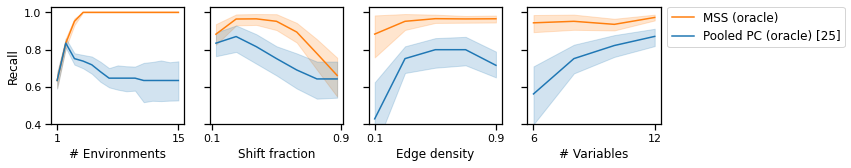

ba


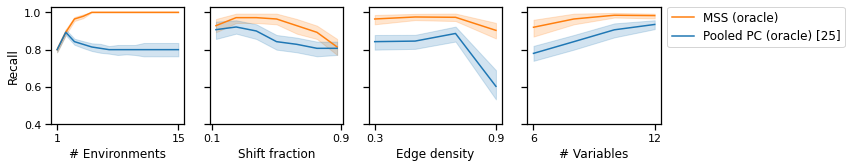

In [12]:
sns.set_context('notebook')

plot_df = df

grid_vars = [
    '# Environments', 'Shift fraction', 'Edge density', '# Variables'
]

# Indices are based on the size of the parameter sets tested on
indices = [
    (22, 36), (8, 22), (36, 46), (0, 8),
]

for graph_model in plot_df['dag_simulator'].unique():
    fig, axes = plt.subplots(1, 4, sharey=True, figsize=(12, 2.5))

    for g_var, (lb, ub), ax in zip(grid_vars, indices, axes.flatten()):
        plot_df_ax = plot_df[
            (plot_df['params_index'] >= lb)
            & (plot_df['params_index'] < ub)
            & (plot_df['dag_simulator'] == graph_model)
            # IMPORTANT! otherwise average over all number of environments
            & (
                (plot_df['# Environments'] == 3)
                if not (g_var == '# Environments') else True)
        ]
        
        sns.lineplot(
            data=plot_df_ax,
            x=g_var,
            y='Recall',
            hue='Method',
            ax=ax,
            hue_order=['MSS (oracle)', 'Pooled PC (oracle) [25]'],
            palette=[
                sns.color_palette("tab10")[i]
                for i in [1, 0] # 3, 4, 5, 
            ],
            legend='full',
        )
        
        ax.set_xticks([
            np.round(plot_df_ax[g_var].min(), 1),
            np.round(plot_df_ax[g_var].max(), 1)
        ])

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.setp(axes[-1].get_legend().get_texts(), fontsize=12)
    for ax in axes[:-1]:
        ax.get_legend().remove()
        
    plt.ylim([0.4, 1.03])
    print(graph_model)
    plt.tight_layout()
    if SAVE_FIGURES:
        plt.savefig(f'./figures/oracle_select_rates_{graph_model}.pdf')
    plt.show()

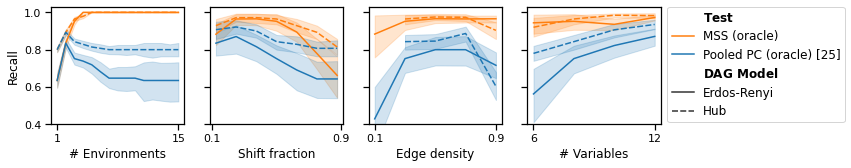

In [13]:
sns.set_context('notebook')

plot_df = df

grid_vars = [
    '# Environments', 'Shift fraction', 'Edge density', '# Variables'
]

indices = [
    (22, 36), (8, 22), (36, 46), (0, 8),
]

fig, axes = plt.subplots(1, 4, sharey=True, figsize=(12, 2.5))

for g_var, (lb, ub), ax in zip(grid_vars, indices, axes.flatten()):
    plot_df_ax = plot_df[
        (plot_df['params_index'] >= lb)
        & (plot_df['params_index'] < ub)
        # IMPORTANT! otherwise average over all number of environments
        & (
            (plot_df['# Environments'] == 3)
            if not (g_var == '# Environments') else True)
    ]

    sns.lineplot(
        data=plot_df_ax.replace(
                {'er': 'Erdos-Renyi', 'ba': 'Hub'},
            ).rename(
                {'dag_simulator': r'$\bf{DAG\ Model}$', 'Method': r'$\bf{Test}$'},
                axis=1),
        x=g_var,
        y='Recall',
        hue=r'$\bf{Test}$',
        # style="Test",
        ax=ax,
        hue_order=['MSS (oracle)', 'Pooled PC (oracle) [25]'],
        palette=[
            sns.color_palette("tab10")[i]
            for i in [1, 0] # 3, 4, 5, 
        ],
        style=r'$\bf{DAG\ Model}$',
        legend='full',
    )

    ax.set_xticks([
        np.round(plot_df_ax[g_var].min(), 1),
        np.round(plot_df_ax[g_var].max(), 1)
    ])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(axes[-1].get_legend().get_texts(), fontsize=12)
for ax in axes[:-1]:
    ax.get_legend().remove()

plt.ylim([0.4, 1.03])
plt.tight_layout()
if SAVE_FIGURES:
    plt.savefig(f'./figures/oracle_select_rates_all_models.pdf')
plt.show()